In [215]:
import numpy as np
import torch

In [216]:
N = 100
D_in = 50

dtype = torch.float
device = torch.device("cpu")

In [424]:
batch_size = 64
input_size = 1
hidden_size = 10
output_size = 1

In [618]:
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

In [619]:
x = np.arange(-10, 10, 0.01).reshape(-1, 1)
y = x**2 * np.sin(x).reshape(-1, 1)
bias = np.full((2000,1), -3.9)


In [620]:
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
bias = torch.FloatTensor(bias)

In [621]:

learning_rate = 1e-6
for t in range(5000):
    #Forward pass:compute predicted y
    h1 = x.mm(w1).add(bias)
    h1_relu = h1.clamp(min=0.0)
    y_pred = h1_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).mean().item()
    if t % 100 == 0:
      print(t, loss)
    s = 2 * (y_pred - y)

    grad_w2 = h1_relu.T.mm(s)


    d1_dypred = s.mm(w2.T)
    d1_dypred[h1_relu == 0] = 0
    grad_w1 = x.T.mm(d1_dypred)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 658.828857421875
100 590.5112915039062
200 574.9006958007812
300 566.1306762695312
400 560.473388671875
500 557.6998901367188
600 558.323974609375
700 571.5043334960938
800 558.5146484375
900 561.0437622070312
1000 564.2889404296875
1100 624.8442993164062
1200 561.1094360351562
1300 560.1534423828125
1400 560.6368408203125
1500 597.799560546875
1600 561.5401611328125
1700 561.6243896484375
1800 561.1260375976562
1900 612.1362915039062
2000 560.7508544921875
2100 560.985107421875
2200 561.3558959960938
2300 581.2811279296875
2400 560.8035888671875
2500 561.0460205078125
2600 562.6309204101562
2700 561.1272583007812
2800 560.8365478515625
2900 561.1321411132812
3000 598.347412109375
3100 560.7566528320312
3200 560.86767578125
3300 561.2127685546875
3400 624.2870483398438
3500 561.1531372070312
3600 561.210205078125
3700 561.19677734375
3800 577.359619140625
3900 560.4691772460938
4000 560.6414794921875
4100 562.3960571289062
4200 562.1810302734375
4300 560.833251953125
4400 561.0618896

In [622]:
loss

561.5399780273438

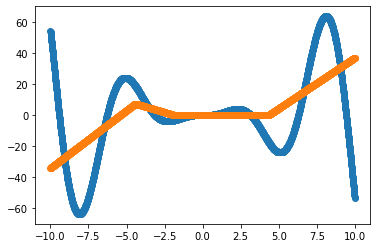

In [623]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.scatter(x, y_pred)

In [624]:
from torch import nn
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        TwoLayerNet наследуется от nn.Module и тем самым полчаем возможность
        переопределять методы класса.
        В конструктуре создаем слои (обучаемые веса) и другие нужные перменные/функции,
        которые нужны для модели
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size, bias=True)
        self.linear2 = torch.nn.Linear(hidden_size, output_size, bias=True)

    def forward(self, x):
        """
        Метод forward отвечает за прямое распростронение модели, 
        поэтому данный метод нужно переопределять обязательно, 
        чтобы задать логику прямого распростронения. 
        Именно в этот момент начинает строится динамический граф
        """
        h_relu = torch.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        
        return y_pred
        

In [477]:
batch_size = 64
input_size = 1
hidden_size = 10
output_size = 1

# x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
# y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

model = TwoLayerNet(input_size, hidden_size, output_size)

loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for t in range(50000):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 739.34619140625
1000 639.2765502929688
2000 635.7009887695312
3000 631.6990966796875
4000 627.0515747070312
5000 621.5773315429688
6000 614.98974609375
7000 606.4849853515625
8000 596.7946166992188
9000 587.083251953125
10000 578.2254028320312
11000 570.4061889648438
12000 565.0797729492188
13000 561.6181640625
14000 559.3751220703125
15000 557.8626098632812
16000 556.7739868164062
17000 555.932373046875
18000 555.2404174804688
19000 554.6458740234375
20000 554.12060546875
21000 553.6503295898438
22000 553.2249145507812
23000 552.8364868164062
24000 552.4765014648438
25000 552.1354370117188
26000 551.803466796875
27000 551.47119140625
28000 551.1259765625
29000 550.7521362304688
30000 550.3120727539062
31000 549.6058349609375
32000 548.6101684570312
33000 548.0553588867188
34000 547.498779296875
35000 546.9303588867188
36000 546.346435546875
37000 545.74462890625
38000 545.124755859375
39000 544.4876708984375
40000 543.8342895507812
41000 543.166015625
42000 542.4841918945312
43000 5

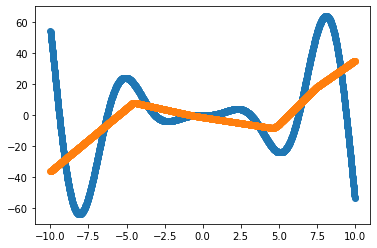

In [478]:
plt.scatter(x, y)
plt.scatter(x, y_pred.detach().numpy())

tensor([[-18.7910],
        [-18.7721],
        [-18.7532],
        ...,
        [ 18.9502],
        [ 18.9692],
        [ 18.9883]])